In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv(r"E:\Anas\Machine Learining\ML_projects\Titanic\Data\train.csv")
test = pd.read_csv(r"E:\Anas\Machine Learining\ML_projects\Titanic\Data\test.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# distribution of numerical features 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# distribution of categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar' ,stacked=True ,figsize=(10,5))

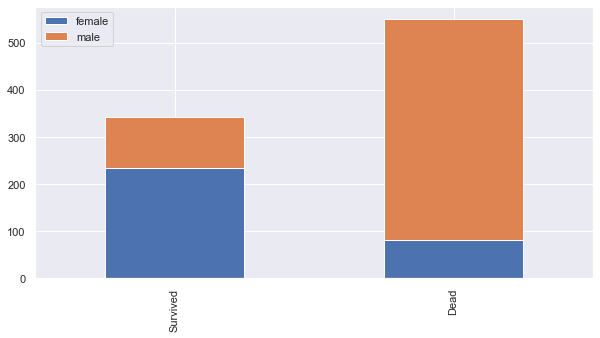

In [14]:
bar_chart('Sex')

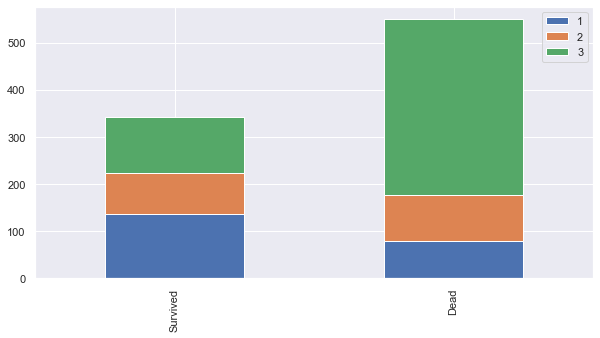

In [15]:
bar_chart('Pclass')

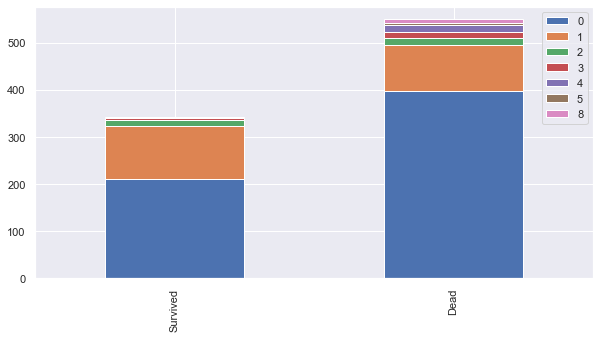

In [16]:
bar_chart('SibSp')

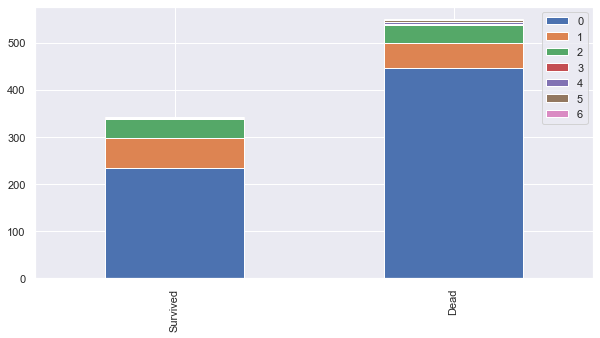

In [17]:
bar_chart('Parch')

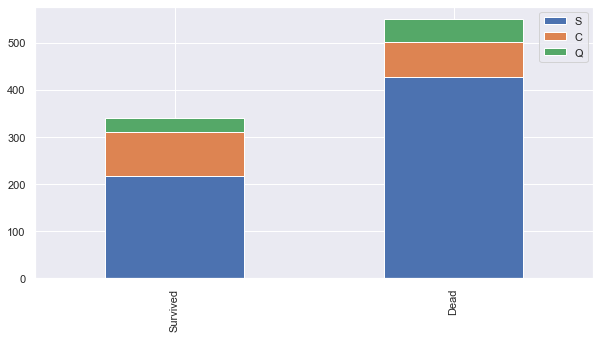

In [18]:
bar_chart('Embarked')

In [19]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Creating new feature "Title"

In [20]:
# compiling train and test data

train_test_data = [train, test]

In [21]:
for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.' , expand = False)


In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [23]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

## Title map
Mr : 0

Miss : 1

Mrs : 2

Master : 3

Others : 4

In [24]:
title_maping =  {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }


for dataset in train_test_data :
    dataset['Title'] = dataset['Title'].map(title_maping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.156673
1,1,0.697802
2,2,0.792000
3,3,0.575000
4,4,0.444444


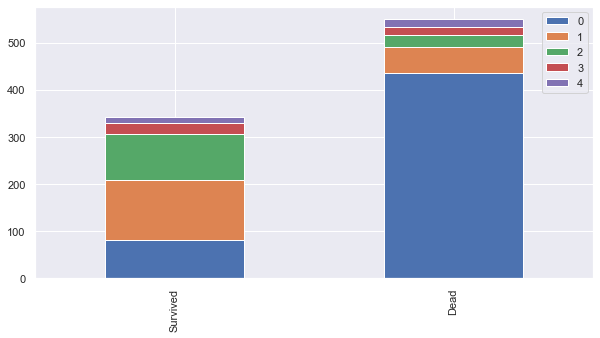

In [27]:
bar_chart('Title')

## delete unnecessary feature from dataset
'Name' , 'Ticket',  'Cabin' ,

In [28]:
train = train.drop(['Name','Ticket', 'Cabin'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin'], axis=1)
train_test_data = [train, test]

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,2
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,2


In [31]:
train.shape

(891, 10)

In [32]:
test.shape

(418, 9)

## sex
Male : 0

Femal : 1

In [33]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0


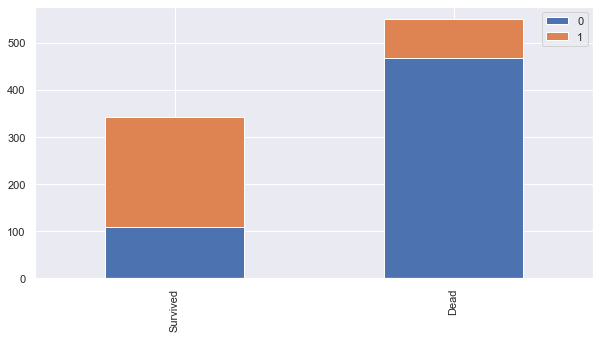

In [35]:
bar_chart('Sex')

fill missing age with median age for each title (Mr, Mrs, Miss,Master ,Others)

In [36]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [37]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0
5,6,0,3,0,30.0,0,0,8.4583,Q,0
6,7,0,1,0,54.0,0,0,51.8625,S,0
7,8,0,3,0,2.0,3,1,21.0750,S,3
8,9,1,3,1,27.0,0,2,11.1333,S,2
9,10,1,2,1,14.0,1,0,30.0708,C,2


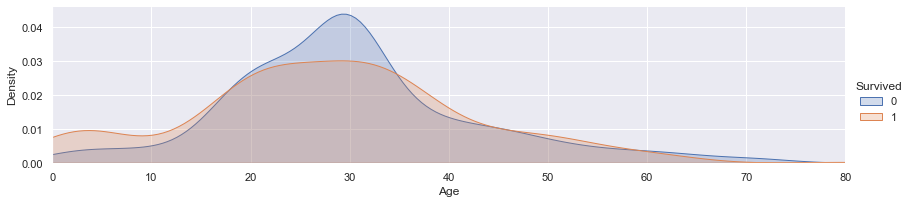

In [38]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

Converting Numerical Age to Categorical Variable

child: 0

young: 1 

adult: 2 

mid-age: 3 

senior: 4 

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [40]:
 train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,S,0
1,2,1,1,1,3.0,1,0,71.2833,C,2
2,3,1,3,1,1.0,0,0,7.9250,S,1
3,4,1,1,1,2.0,1,0,53.1000,S,2
4,5,0,3,0,2.0,0,0,8.0500,S,0
5,6,0,3,0,2.0,0,0,8.4583,Q,0
6,7,0,1,0,3.0,0,0,51.8625,S,0
7,8,0,3,0,0.0,3,1,21.0750,S,3
8,9,1,3,1,2.0,0,2,11.1333,S,2
9,10,1,2,1,0.0,1,0,30.0708,C,2


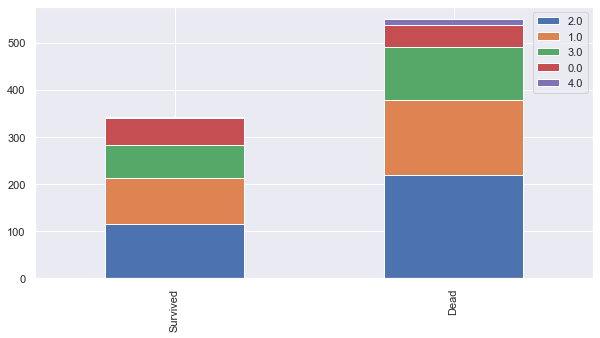

In [41]:
bar_chart('Age')

## Embarked 

filling missing values

<AxesSubplot:>

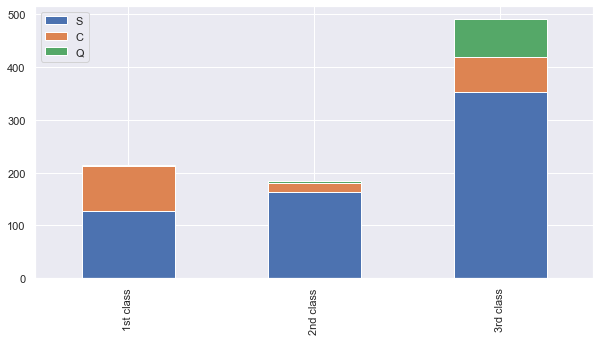

In [42]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark

more than 50% of 2nd class are from S embark

more than 50% of 3rd class are from S embark

## fill out missing embark with S embark

In [43]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [44]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare
fill missing Fare with median fare for each Pclass

In [45]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [46]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,0,0
1,2,1,1,1,3.0,1,0,71.2833,1,2
2,3,1,3,1,1.0,0,0,7.9250,0,1
3,4,1,1,1,2.0,1,0,53.1000,0,2
4,5,0,3,0,2.0,0,0,8.0500,0,0
5,6,0,3,0,2.0,0,0,8.4583,2,0
6,7,0,1,0,3.0,0,0,51.8625,0,0
7,8,0,3,0,0.0,3,1,21.0750,0,3
8,9,1,3,1,2.0,0,2,11.1333,0,2
9,10,1,2,1,0.0,1,0,30.0708,1,2


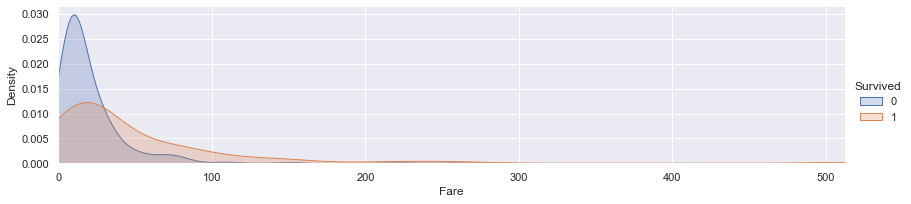

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

(0.0, 120.0)

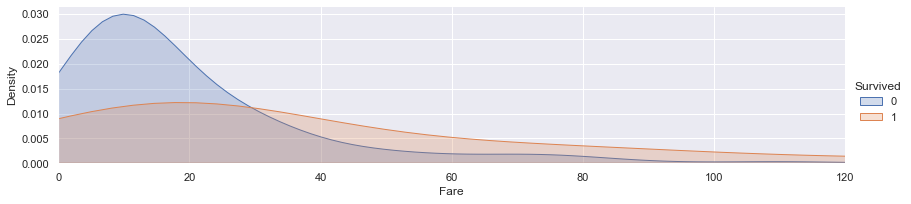

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.xlim(0,120) 

In [49]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 15), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    
train = train.drop(['FareBand'], axis=1)
train_test_data = [train ,test]    

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,0,0
1,2,1,1,1,3.0,1,0,3.0,1,2
2,3,1,3,1,1.0,0,0,0.0,0,1
3,4,1,1,1,2.0,1,0,3.0,0,2
4,5,0,3,0,2.0,0,0,1.0,0,0


## FamilySize
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [52]:
for dataset in train_test_data:
    dataset['FamilySize'] =  dataset['SibSp'] + dataset['Parch'] + 1

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,0,0,2
1,2,1,1,1,3.0,1,0,3.0,1,2,2
2,3,1,3,1,1.0,0,0,0.0,0,1,1
3,4,1,1,1,2.0,1,0,3.0,0,2,2
4,5,0,3,0,2.0,0,0,1.0,0,0,1


(0.0, 11.0)

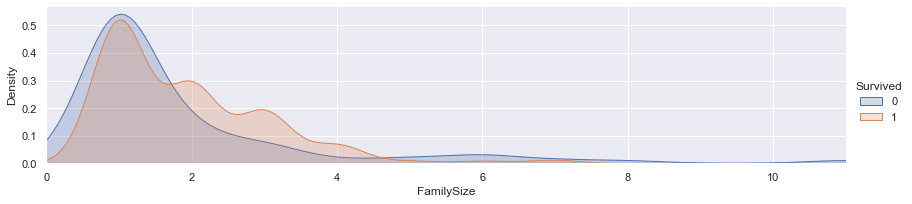

In [54]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,0,0,2
1,2,1,1,1,3.0,1,0,3.0,1,2,2
2,3,1,3,1,1.0,0,0,0.0,0,1,1
3,4,1,1,1,2.0,1,0,3.0,0,2,2
4,5,0,3,0,2.0,0,0,1.0,0,0,1


In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,0.0,2,0,1
1,893,3,1,3.0,1,0,0.0,0,2,2
2,894,2,0,3.0,0,0,1.0,2,0,1
3,895,3,0,2.0,0,0,1.0,0,0,1
4,896,3,1,1.0,1,1,1.0,0,2,3


In [57]:
train = train.drop([ 'SibSp', 'Parch' ,'PassengerId'], axis=1)
test = test.drop([ 'SibSp', 'Parch'], axis=1)

In [58]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,2
1,1,1,1,3.0,3.0,1,2,2
2,1,3,1,1.0,0.0,0,1,1
3,1,1,1,2.0,3.0,0,2,2
4,0,3,0,2.0,1.0,0,0,1


## Modelling
k-Nearest Neighbors

Decision Tree

Logistic Regression

Support Vector Machine

Gaussian Naive Bayes

neural_network_MLPClassifier

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [60]:
data = train.copy()
y = data['Survived']
x = data.drop(['Survived'], axis=1)

In [61]:
# Splitting data

x_train, x_test, y_train, y_test = train_test_split(x, y,
                        test_size=0.30, random_state=44, shuffle =True)

In [62]:
# 1  KNN
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 2,
                                          weights ='distance', # uniform , distance
                                          algorithm='auto') # :  auto ,  ball_tree ,  kd_tree  , brute  
KNNClassifierModel.fit(x_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))

KNNClassifierModel Train Score is :  0.8715890850722311
KNNClassifierModel Test Score is :  0.7723880597014925


Confusion Matrix is : 
 [[144  20]
 [ 41  63]]


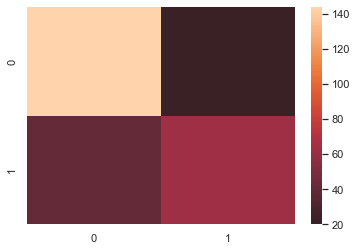

In [63]:
#Calculating Confusion Matrix
y_pred = KNNClassifierModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [64]:
# 2 DecisionTree
'''
sklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                    min_impurity_split=None, class_weight=None,presort=False)
'''
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',
                                                     max_depth=3 ,random_state=33) #criterion can be entropy , gini  
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))


DecisionTreeClassifierModel Train Score is :  0.8330658105939005
DecisionTreeClassifierModel Test Score is :  0.8022388059701493


Confusion Matrix is : 
 [[138  26]
 [ 27  77]]


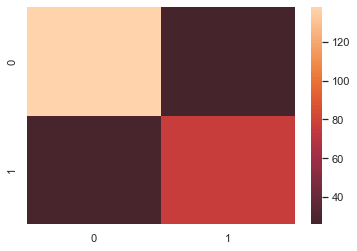

In [65]:
#Calculating Confusion Matrix
y_pred = DecisionTreeClassifierModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [66]:
# 3 LogisticRegression
'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',max_iter=100,C=1.0,random_state=33) # solver 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'
LogisticRegressionModel.fit(x_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))

LogisticRegressionModel Train Score is :  0.8186195826645265
LogisticRegressionModel Test Score is :  0.7910447761194029


Confusion Matrix is : 
 [[133  31]
 [ 25  79]]


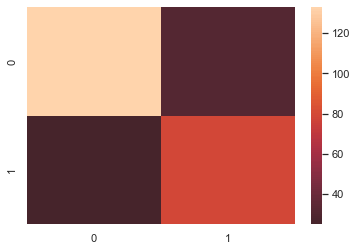

In [67]:
#Calculating Confusion Matrix
y_pred = LogisticRegressionModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [68]:
# 4  SVC
'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC()# it can be also rbf ,linear,poly,sigmoid,precomputed
            
SVCModel.fit(x_train, y_train)

print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))

SVCModel Train Score is :  0.8459069020866774
SVCModel Test Score is :  0.8059701492537313


Confusion Matrix is : 
 [[142  22]
 [ 30  74]]


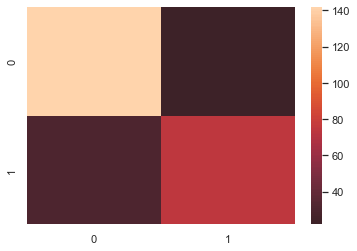

In [69]:
#Calculating Confusion Matrix
y_pred = SVCModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [70]:
# 5 GaussianNB
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(x_train, y_train)

print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(x_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(x_test, y_test))

GaussianNBModel Train Score is :  0.8105939004815409
GaussianNBModel Test Score is :  0.75


Confusion Matrix is : 
 [[120  44]
 [ 23  81]]


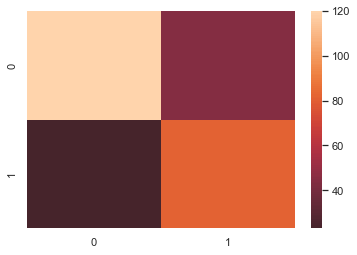

In [71]:
#Calculating Confusion Matrix
y_pred = GaussianNBModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [72]:
# 6 neural_network_MLPClassifier
'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, 
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu ,tanh
                                   solver='adam',  # can be also sgd , adam ,lbfgs
                                   learning_rate='constant', # can be also invscaling , adaptive ,constant
                                   max_iter=200,
                                   hidden_layer_sizes=(1200,40),random_state=33)
MLPClassifierModel.fit(x_train, y_train)

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(x_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(x_test, y_test))

MLPClassifierModel Train Score is :  0.8507223113964687
MLPClassifierModel Test Score is :  0.8059701492537313


Confusion Matrix is : 
 [[140  24]
 [ 28  76]]


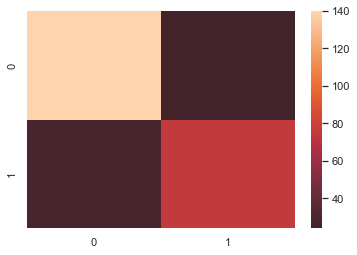

In [73]:
#Calculating Confusion Matrix
y_pred = MLPClassifierModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [75]:
test_data = test.drop("PassengerId", axis=1).copy()
prediction = SVCModel.predict(test_data)

In [76]:
submission_Titanic = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission_Titanic.to_csv('submission_Titanic.csv', index=False)

In [77]:
submission = pd.read_csv('submission_Titanic.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
